In [1]:
%config Completer.use_jedi = False

In [2]:
#pip install mlxtend

In [3]:
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [4]:
data = pd.read_csv('df_for_RF.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Subject_ID,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [5]:
X = data.iloc[0:117,3:]
y = data.iloc[0:117, 1]

### Wrapper_bidirectional(stepwise)

In [6]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [7]:
stepwise_selection(X,y)

<ipython-input-6-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-6-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-6-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-6-824a394047ac>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipy

['zDCwei_17Networks_LH_SalVentAttnA_FrMed_1',
 'zReHo_17Networks_RH_DorsAttnB_FEF_3',
 'zReHo_17Networks_RH_SomMotA_17',
 'zfALFF_17Networks_RH_ContB_PFCld_3']

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(RandomForestClassifier(),
         k_features=(51, 81),
         forward=True,
         floating=False,
         cv=10)
sfs1.fit(X, y)

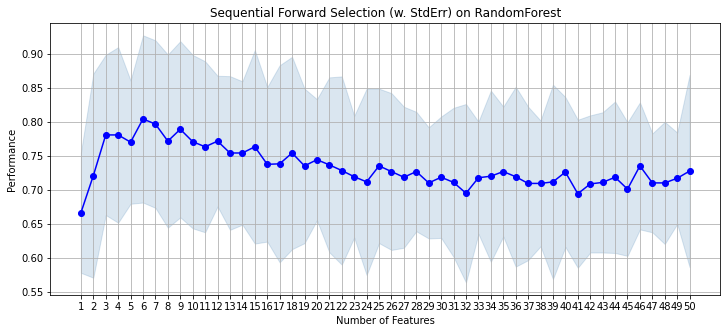

In [29]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev', figsize=(12,5))
plt.title('Sequential Forward Selection (w. StdErr) on RandomForest')

plt.grid()
plt.show()


## Implementing bi-directional elimination using built-in functions for Random Forest:

In [30]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(RandomForestClassifier(),
         k_features=6,
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

('zfALFF_17Networks_9',
 'zfALFF_17Networks_2',
 'zfALFF_lPFtha_L',
 'zfALFF_cTtha_L',
 'zfALFF_Otha_L',
 'zfALFF_rTtha_R')